In [5]:
# import libraries and packages

import os
import numpy as np
from assaytools import parser
import string
from glob import glob

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sns.set(style='white')
sns.set_context('talk')

In [1]:
#### load data files

xml_files = ['infinite_results/p38_Bos_NB_20190709_154049.xml',
             'infinite_results/p38_Bos_Iso_NB_20190709_155414.xml',
            'infinite_results/p38_Erl_NB_20190709_160747.xml',
            'infinite_results/p38_Gef_NB_20190709_162114.xml']

In [19]:
### create ligand concentration arrays 

ligand_conc = [ 0.00000000e+00, 8.00000000e-09, 1.74937932e-08, 3.82541000e-08,
                           8.36511642e-08, 1.82922021e-07, 4.00000000e-07, 8.74689659e-07,
                           1.91270500e-06, 4.18255821e-06, 9.14610104e-06, 2.00000000e-05 ]
ligand_conc = np.flip(ligand_conc, axis=0)

In [20]:
def inputs(xml_files, prot_wells, buff_wells):
    return({
    'xml_files'     :  xml_files,
    'file_set'      :  {'p38_1': xml_files},
    'protein_wells'  :  {'p38_1': prot_wells},
    'ligand_order'  :  ['Bosutinib','Bosutinib Isomer','Erlotinib','Gefitinib'],
    'buffer_wells'   :  {'p38_1': buff_wells},
    'section'       :  '280_480_TOP_100',
    'wavelength'    :  '480',
    'Lstated'       :  np.array(ligand_conc, np.float64), # ligand concentration
    'Pstated'       :  0.5e-6 * np.ones([12],np.float64), # protein concentration, M
    'assay_volume'  :  100e-6, # assay volume, L
    'well_area'     :  0.3969, # well area, cm^2 for 4ti-0203 [http://4ti.co.uk/files/3113/4217/2464/4ti-0201.pdf]
    })

In [21]:
#### create inputs for assaytools' parser script

inputs= inputs(xml_files=xml_files, prot_wells=['A1','B1','C1','D1'], buff_wells=['A2','B2','C2','D2'], )

In [22]:
[complex_fluorescence, ligand_fluorescence] = parser.get_data_using_inputs(inputs)

print("complex_fluorescence:\n", complex_fluorescence)
print("ligand_fluorescence:\n", ligand_fluorescence)

Skipping analysis of rows:  []
complex_fluorescence:
 {'p38_1-Bosutinib-AB': array([18170., 13689., 11829.,  9837.,  7855.,  5939.,  4644.,  4112.,
        3813.,  3675.,  3542.,  3569.]), 'p38_1-Bosutinib Isomer-CD': array([26871., 16735., 12003.,  8266.,  6078.,  4711.,  3914.,  3703.,
        3568.,  3446.,  3621.,  3565.]), 'p38_1-Erlotinib-EF': array([18055., 10743.,  7381.,  5386.,  4347.,  3865.,  3551.,  3359.,
        3478.,  3502.,  3460.,  3407.]), 'p38_1-Gefitinib-GH': array([28451., 23926., 19462., 13868., 10213.,  6889.,  5021.,  4147.,
        3853.,  3611.,  3613.,  3484.])}
ligand_fluorescence:
 {'p38_1-Bosutinib-AB': array([10929.,  6092.,  4468.,  4039.,  3742.,  3555.,  3495.,  3609.,
        3536.,  3588.,  3459.,  3465.]), 'p38_1-Bosutinib Isomer-CD': array([17061.,  7853.,  5348.,  4407.,  3938.,  3885.,  3478.,  3406.,
        3279.,  3347.,  3369.,  3293.]), 'p38_1-Erlotinib-EF': array([6702., 5992., 3968., 3636., 3378., 3344., 3255., 3252., 3265.,
       3298.

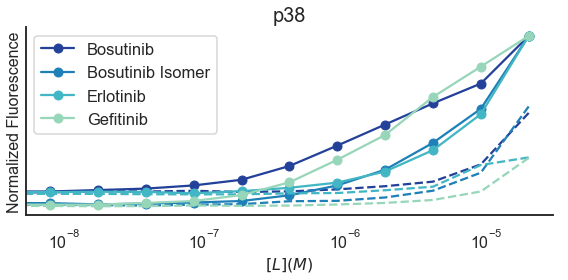

In [23]:
# Plot fluorescence binding curve for 4ti-0234 plate
cols = sns.color_palette('YlGnBu_r', 5)

fig, ax = plt.subplots(figsize=(8,4))

plt.semilogx(inputs['Lstated'],complex_fluorescence['p38_1-Bosutinib-AB']/complex_fluorescence['p38_1-Bosutinib-AB'].max(),marker='o',color=cols[0],label='Bosutinib')
plt.semilogx(inputs['Lstated'],ligand_fluorescence['p38_1-Bosutinib-AB']/complex_fluorescence['p38_1-Bosutinib-AB'].max(),linestyle='--',color=cols[0])

plt.semilogx(inputs['Lstated'],complex_fluorescence['p38_1-Bosutinib Isomer-CD']/complex_fluorescence['p38_1-Bosutinib Isomer-CD'].max(),marker='o',color=cols[1],label='Bosutinib Isomer')
plt.semilogx(inputs['Lstated'],ligand_fluorescence['p38_1-Bosutinib Isomer-CD']/complex_fluorescence['p38_1-Bosutinib Isomer-CD'].max(),linestyle='--',color=cols[1])

plt.semilogx(inputs['Lstated'],complex_fluorescence['p38_1-Erlotinib-EF']/complex_fluorescence['p38_1-Erlotinib-EF'].max(),marker='o',color=cols[2],label='Erlotinib')
plt.semilogx(inputs['Lstated'],ligand_fluorescence['p38_1-Erlotinib-EF']/complex_fluorescence['p38_1-Erlotinib-EF'].max(),linestyle='--',color=cols[2])

plt.semilogx(inputs['Lstated'],complex_fluorescence['p38_1-Gefitinib-GH']/complex_fluorescence['p38_1-Gefitinib-GH'].max(),marker='o',color=cols[3],label='Gefitinib')
plt.semilogx(inputs['Lstated'],ligand_fluorescence['p38_1-Gefitinib-GH']/complex_fluorescence['p38_1-Gefitinib-GH'].max(),linestyle='--',color=cols[3])


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('p38',fontsize=20)
plt.yticks([])
plt.ylabel('Normalized Fluorescence',fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('$[L] (M)$',fontsize=16)
plt.legend(loc=2)

plt.tight_layout()

plt.savefig('p38_binding_curve.png', dpi=500)
plt.savefig('p38_binding_curve.pdf')
